In [20]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from PIL import Image

## Data using FER2013 raw (original data)

In [2]:
data_dir = 'D://Kuliah//UPI//SEMESTER 8//dataset skripsi//fer2013_raw'

class_map = {
    'Angry': 0,
    'Disgust': 1,
    'Fear': 2,
    'Happy': 3,
    'Sad': 4,
    'Surprise': 5,
    'Neutral': 6,
}

In [3]:
image_data = []
labels = []

# Loop untuk setiap folder (kelas)
for class_folder in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_folder)

    # Pastikan folder yang diambil adalah folder valid (bukan file atau lainnya)
    if os.path.isdir(class_path):
        label = class_map[class_folder]  # Ambil label sesuai map kelas

        # Loop untuk setiap gambar dalam folder kelas tersebut
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)

            # Load gambar dengan OpenCV dalam bentuk grayscale
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Pastikan gambar terbaca dengan benar
            if image is not None:
                # Flatten gambar menjadi 1D array dan ubah ke string terpisah dengan spasi
                image_flat = ' '.join(map(str, image.flatten()))

                # Simpan gambar dan labelnya
                image_data.append(image_flat)
                labels.append(label)

In [4]:
df = pd.DataFrame({
    'pixels': image_data,
    'emotion': labels,
})

In [5]:
df

,pixels,emotion
0,46 34 26 23 12 32 35 26 26 38 71 99 123 134 14...,0
1,55 33 54 32 26 21 50 29 38 45 79 73 43 22 51 5...,0
2,123 123 126 131 124 69 109 149 159 174 169 178...,0
3,255 255 255 255 255 255 255 255 255 251 254 16...,0
4,127 121 124 137 123 118 120 111 111 109 118 14...,0
...,...,...
35882,27 26 26 26 27 27 28 28 33 34 35 33 29 31 35 3...,5
35883,7 6 13 39 76 58 29 21 16 20 34 56 70 76 88 96 ...,5
35884,124 129 125 123 129 128 127 128 131 70 73 76 6...,5
35885,242 242 242 216 110 42 20 41 37 14 14 53 36 8 ...,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pixels   35887 non-null  object
 1   emotion  35887 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 560.9+ KB


In [24]:
pixel_string = df['pixels'][0]
pixel = np.array(pixel_string.split(), dtype='float32')
image = Image.fromarray(pixel.squeeze().astype('uint8'), mode='L')
image.shape

AttributeError: 'Image' object has no attribute 'shape'

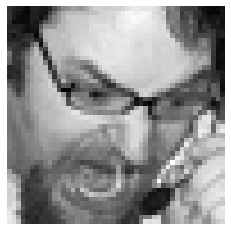

In [7]:
def string_to_image(pixels_string):
    pixels = np.array(pixels_string.split(), dtype='float32')
    image = pixels.reshape(48, 48)
    image = image / 255.0
    return image

pixels_string = df.iloc[0]['pixels']
image = string_to_image(pixels_string)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [8]:
emotion_labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
emotion_counts = df['emotion'].value_counts(sort=True).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_labels)
emotion_counts

,emotion,number
0,Happy,8989
1,Neutral,6198
2,Sad,6077
3,Fear,5121
4,Angry,4953
5,Surprise,4002
6,Disgust,547


C:\Users\MoKha\AppData\Local\Temp\ipykernel_25408\2852025549.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)


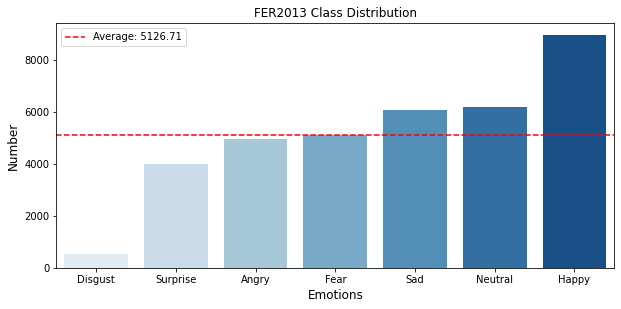

In [9]:
emotion_counts_sorted = emotion_counts.sort_values(by='number', ascending=True)

# Calculate the average count
average_count = emotion_counts['number'].mean()

# Define colors and plot
colors = sns.color_palette("Blues", len(emotion_counts_sorted))

plt.figure(figsize=(10, 4.5))
sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)
plt.title('FER2013 Class Distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)

# Add a horizontal line for the average
plt.axhline(average_count, color='red', linestyle='--', linewidth=1.5, label=f'Average: {average_count:.2f}')

# Add a legend to display the average line label
plt.legend()

plt.show()

In [10]:
df.isnull().sum()

pixels     0
emotion    0
dtype: int64

### Cek data yang duplikat

In [11]:
duplicate_count = df.duplicated(subset='pixels').sum()

print(f"Number of duplicate rows': {duplicate_count}")

Number of duplicate rows': 1853


In [12]:
df[df.duplicated(subset='pixels')]

,pixels,emotion
319,181 179 177 175 175 175 173 171 169 166 166 16...,0
386,181 179 177 175 175 175 173 171 169 166 166 16...,0
423,1 30 98 116 117 87 42 43 65 121 130 99 84 84 7...,0
490,214 214 214 208 91 36 42 96 118 119 118 119 11...,0
594,14 11 12 13 11 12 13 9 22 35 65 42 59 65 72 73...,0
...,...,...
35866,42 45 43 39 46 64 90 142 144 155 158 166 169 1...,5
35869,253 253 254 253 170 101 105 102 85 91 120 141 ...,5
35874,125 66 81 63 122 75 47 93 98 63 52 53 27 41 28...,5
35877,45 36 42 35 33 29 141 188 185 167 168 166 139 ...,5


In [13]:
df['pixels'][319]

'181 179 177 175 175 175 173 171 169 166 166 164 161 161 161 156 153 142 124 94 81 90 93 89 96 62 45 51 87 101 128 151 169 172 171 176 175 166 176 174 178 178 178 179 181 182 182 182 179 178 176 174 174 173 171 169 168 167 164 159 161 159 157 152 152 128 115 117 134 154 161 163 161 152 135 100 87 67 125 127 145 173 173 166 170 176 173 180 177 179 181 182 181 179 177 175 179 178 176 175 174 173 171 168 167 162 164 163 159 153 153 152 147 148 158 168 176 181 178 174 175 185 190 195 194 141 125 123 127 169 168 169 176 176 178 174 178 179 179 176 172 173 179 185 176 175 174 172 171 170 167 165 162 163 158 153 152 154 151 148 148 151 155 159 170 182 179 169 173 175 185 193 197 212 186 150 119 147 176 173 174 173 177 178 177 173 171 173 179 183 184 183 187 187 185 184 182 181 178 175 172 173 162 165 163 155 140 145 150 158 165 171 177 180 178 174 172 184 185 188 196 201 210 210 150 115 166 175 170 181 175 172 171 175 179 181 181 181 182 183 192 192 191 189 187 185 182 180 176 173 170 170 149

In [14]:
df[df["pixels"] == "181 179 177 175 175 175 173 171 169 166 166 164 161 161 161 156 153 142 124 94 81 90 93 89 96 62 45 51 87 101 128 151 169 172 171 176 175 166 176 174 178 178 178 179 181 182 182 182 179 178 176 174 174 173 171 169 168 167 164 159 161 159 157 152 152 128 115 117 134 154 161 163 161 152 135 100 87 67 125 127 145 173 173 166 170 176 173 180 177 179 181 182 181 179 177 175 179 178 176 175 174 173 171 168 167 162 164 163 159 153 153 152 147 148 158 168 176 181 178 174 175 185 190 195 194 141 125 123 127 169 168 169 176 176 178 174 178 179 179 176 172 173 179 185 176 175 174 172 171 170 167 165 162 163 158 153 152 154 151 148 148 151 155 159 170 182 179 169 173 175 185 193 197 212 186 150 119 147 176 173 174 173 177 178 177 173 171 173 179 183 184 183 187 187 185 184 182 181 178 175 172 173 162 165 163 155 140 145 150 158 165 171 177 180 178 174 172 184 185 188 196 201 210 210 150 115 166 175 170 181 175 172 171 175 179 181 181 181 182 183 192 192 191 189 187 185 182 180 176 173 170 170 149 139 138 147 154 160 163 171 179 180 179 175 168 172 175 192 209 204 212 210 210 143 123 157 177 169 167 173 179 178 178 179 181 182 182 182 193 192 191 189 187 185 182 180 174 176 166 142 130 138 149 151 151 157 155 159 168 175 180 179 173 180 192 200 203 209 206 199 201 208 146 121 159 170 175 176 176 179 181 182 180 180 181 183 193 193 191 189 187 185 182 180 177 174 143 121 149 143 127 130 149 151 147 152 164 169 177 180 183 191 199 200 198 189 181 176 175 179 195 150 154 178 176 179 181 178 176 177 181 183 183 181 193 193 192 189 186 186 184 180 180 159 117 137 126 105 95 104 123 141 142 143 150 161 168 179 192 196 199 192 191 193 183 166 161 163 177 193 173 172 176 177 179 178 178 179 178 176 174 174 195 193 192 190 186 185 184 184 174 113 112 114 104 100 97 98 115 127 136 140 142 146 158 176 187 198 197 193 204 203 195 197 204 199 186 178 173 168 178 177 178 176 173 171 172 175 180 184 196 192 192 190 187 185 185 187 143 98 117 117 133 141 139 123 117 122 134 140 135 132 148 172 191 201 197 207 206 209 198 203 209 218 225 197 185 170 182 174 170 173 176 177 179 181 181 181 195 192 192 189 187 186 187 182 120 95 124 136 138 142 154 145 127 120 120 133 127 123 146 175 201 202 198 214 212 200 188 198 212 213 221 221 205 159 181 171 173 176 179 180 181 182 182 181 194 193 192 188 188 187 187 165 90 95 132 127 111 103 107 134 137 126 107 120 119 126 154 179 199 204 216 215 197 186 188 177 165 167 188 213 221 175 173 191 178 179 179 178 179 180 182 182 194 195 191 189 188 188 187 144 79 113 126 93 82 96 101 100 116 120 100 101 118 146 174 182 200 218 217 207 179 172 152 120 130 145 144 169 207 184 166 198 177 177 179 180 181 181 181 181 194 196 190 192 189 187 187 127 80 121 95 100 138 155 139 106 102 110 96 84 113 144 165 171 201 229 206 186 163 147 135 153 166 196 213 176 169 179 151 193 181 178 177 179 180 180 181 183 193 195 189 194 190 186 187 118 87 111 106 164 158 126 135 153 97 89 82 74 115 136 158 185 196 207 203 175 154 132 137 130 122 136 220 233 189 164 131 193 182 178 177 180 181 178 178 180 194 192 194 191 192 185 187 121 90 112 127 147 91 74 83 112 96 68 85 109 131 141 162 178 188 196 195 180 155 119 118 117 87 114 199 237 211 172 106 184 185 171 175 170 170 171 173 175 193 193 191 190 191 186 191 132 82 125 118 112 90 88 109 111 109 93 120 129 137 146 150 158 179 198 212 201 151 138 147 147 155 166 185 199 213 198 111 173 180 169 174 173 175 178 180 182 193 195 190 191 190 185 191 145 92 146 130 128 127 126 119 99 82 99 123 125 141 158 150 152 168 189 210 220 193 149 134 156 174 197 210 218 226 219 129 158 186 176 180 179 179 181 181 182 193 193 190 191 188 185 187 159 122 137 116 113 109 99 80 79 105 123 118 117 135 155 157 160 171 181 200 218 223 200 175 153 161 183 207 219 216 221 159 154 181 175 177 176 176 178 178 179 193 188 190 189 186 185 185 174 141 125 115 103 102 95 102 115 117 114 106 117 128 147 162 167 169 167 184 218 222 216 210 192 176 182 198 211 219 227 186 157 178 176 176 177 177 180 180 181 194 186 189 186 183 184 184 176 136 129 126 121 115 117 123 112 99 103 113 128 142 159 163 169 173 175 181 200 217 209 206 210 201 193 195 201 209 215 203 168 176 177 175 175 174 177 177 179 191 188 187 183 182 181 183 165 132 131 122 125 118 122 113 92 95 113 119 128 147 162 166 178 179 186 200 196 202 185 181 205 205 195 194 200 206 209 215 175 172 177 175 176 175 179 179 181 185 187 184 182 183 180 183 154 132 124 123 124 125 111 96 87 115 124 118 129 141 144 163 176 183 209 220 209 204 192 158 184 210 208 200 200 206 205 217 184 168 174 172 173 170 174 174 176 184 183 184 181 181 180 180 148 128 125 125 123 109 100 84 97 123 116 113 127 137 137 151 177 199 215 215 210 209 201 167 159 192 212 205 205 211 210 211 188 167 169 169 169 171 172 173 175 183 182 182 180 180 179 180 146 126 126 119 117 104 95 75 96 112 106 111 121 134 133 154 178 198 199 200 209 214 208 174 141 173 203 205 209 216 216 216 191 170 173 175 175 177 178 179 181 181 180 180 180 179 178 182 144 125 124 114 108 98 80 69 93 97 81 110 114 120 136 157 175 187 205 182 141 179 208 187 135 148 189 205 214 219 221 218 190 170 174 175 175 177 177 178 180 180 179 178 180 179 178 183 146 122 120 112 100 93 64 73 91 87 51 53 119 125 130 141 162 195 126 30 58 148 200 198 147 125 168 199 214 218 220 217 187 168 172 173 174 175 177 180 183 178 177 178 179 179 177 182 149 118 116 109 100 84 61 86 94 89 91 64 95 155 155 138 179 179 112 111 171 192 204 205 176 114 141 185 208 213 216 215 185 169 173 174 174 176 177 179 182 178 176 177 177 177 176 180 156 116 113 104 99 72 69 93 93 86 84 93 96 151 158 147 188 194 200 212 198 206 202 205 199 128 122 171 201 210 214 212 180 168 172 174 175 176 177 177 179 177 174 177 173 176 175 178 165 118 112 102 91 60 75 87 80 74 69 66 81 101 130 147 176 183 177 183 177 184 206 197 207 157 112 160 196 209 212 208 170 164 167 170 171 175 178 180 183 177 173 177 171 175 176 179 172 122 110 104 79 53 75 76 66 62 61 78 76 84 103 127 141 153 156 150 140 135 163 187 202 179 107 153 192 210 212 205 164 165 167 166 165 168 170 173 176 175 173 171 172 173 174 176 179 140 108 105 68 59 67 69 65 56 70 84 79 85 92 104 114 119 123 122 128 116 129 153 177 186 120 143 194 212 213 185 162 168 169 172 173 174 174 175 176 172 171 170 172 173 173 175 176 160 117 109 72 66 66 63 64 60 64 74 74 85 87 102 88 97 101 105 122 115 118 135 153 169 134 139 200 209 206 173 165 166 167 169 172 174 177 180 183 171 169 169 170 172 172 172 174 174 133 109 79 72 66 61 62 59 54 67 86 83 87 97 82 85 97 89 99 101 123 119 148 155 139 148 198 215 196 161 158 165 166 168 171 173 177 181 184 171 168 167 168 169 169 170 171 175 155 113 86 73 73 80 74 65 65 68 79 84 93 82 91 84 85 96 94 105 124 135 142 154 146 169 207 208 167 159 165 163 165 168 171 173 176 179 181 169 166 165 166 167 167 168 170 173 171 133 93 74 85 105 96 90 94 97 89 95 98 90 98 106 110 109 113 130 137 164 163 157 150 172 214 189 154 158 156 161 163 166 169 173 176 180 183 167 165 163 164 166 167 167 168 169 172 161 109 81 91 112 107 115 117 107 104 108 113 114 122 121 136 147 154 171 182 184 191 146 154 197 204 160 157 161 160 160 162 164 167 170 175 180 183 166 163 159 159 160 162 164 165 165 167 173 136 92 94 113 120 95 136 138 129 138 158 146 141 175 169 186 204 175 119 175 175 141 159 201 172 144 157 156 156 160 162 164 167 170 174 178 181 166 160 154 152 153 155 159 162 165 166 171 160 102 100 122 141 75 30 55 114 161 179 175 174 205 207 202 125 41 31 143 154 138 179 201 183 161 150 151 154 159 162 165 169 172 175 178 180 158 144 148 148 156 165 155 162 175 176 168 179 124 95 113 142 102 23 18 51 102 127 130 164 172 126 44 0 6 34 124 141 157 192 223 223 220 198 183 167 159 162 160 166 171 175 181 183 167 163 171 164 172 182 159 148 167 176 162 173 139 95 100 117 134 39 35 63 91 94 109 134 126 75 27 22 23 66 133 133 160 207 235 234 236 227 217 214 191 181 182 170 169 177 182 184 177 176 181 163 166 184 166 146 156 170 162 163 141 86 76 95 155 81 45 67 86 103 139 147 135 63 30 45 41 116 143 129 162 225 240 237 230 211 202 212 200 192 183 217 190 172 182 187 178 176 182 169 162 174 171 151 151 164 170 155 126 76 57 81 133 125 94 72 76 104 145 158 120 26 45 67 69 167 127 112 174 239 236 236 227 202 199 215 208 203 189 191 228 213 184 185 187 177 186 188 173 169 179 161 149 161 174 159 118 71 50 69 107 139 144 102 51 90 123 139 61 37 108 70 126 187 107 84 182 238 232 227 224 212 198 198 216 203 218 188 210 232 215 188 196 181 191 200 184 171 184 171 151 158 167 174 135 73 47 62 96 136 141 159 91 35 55 38 31 118 150 76 169 174 90 93 179 222 234 221 222 228 207 187 207 212 207 217 203 230 228 205 194 186 200 205 193 178 183 177 158 163 161 176 162 99 55 60 90 118 116 129 182 113 78 95 131 208 102 112 202 141 77 114 197 214 230 223 222 229 224 198 191 219 206 212 213 227 222 233 198 197 212 203 194 184 186 188 167 176 164 163 180 139 73 58 76 108 121 84 105 156 165 160 146 92 91 171 186 109 88 127 206 203 215 232 235 229 241 213 184 223 211 202 225 226 219 243"]

,pixels,emotion
151,181 179 177 175 175 175 173 171 169 166 166 16...,0
319,181 179 177 175 175 175 173 171 169 166 166 16...,0
386,181 179 177 175 175 175 173 171 169 166 166 16...,0
1717,181 179 177 175 175 175 173 171 169 166 166 16...,0
2094,181 179 177 175 175 175 173 171 169 166 166 16...,0
2919,181 179 177 175 175 175 173 171 169 166 166 16...,0
3865,181 179 177 175 175 175 173 171 169 166 166 16...,0


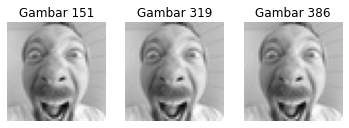

In [15]:
# Indeks gambar yang akan ditampilkan
indices = [151, 319, 386]  # Ganti dengan indeks yang sesuai

# Buat subplot dengan 1 baris dan 3 kolom
fig, axs = plt.subplots(1, 3, figsize=(6, 3))

for i, idx in enumerate(indices):
    # Ambil string piksel dari baris data yang sesuai
    pixels_string = df.iloc[idx]['pixels']
    # Konversi string piksel menjadi gambar
    image = string_to_image(pixels_string)
    # Tampilkan gambar pada subplot
    axs[i].imshow(image, cmap='gray')
    axs[i].axis('off')  # Matikan sumbu
    axs[i].set_title(f'Gambar {idx}')  # Tambahkan judul

plt.show()

In [16]:
df_new = df.drop_duplicates(subset='pixels')

In [17]:
df_new.shape

(34034, 2)

In [18]:
duplicate_count = df_new.duplicated(subset='pixels').sum()

print(f"Number of duplicate rows': {duplicate_count}")

Number of duplicate rows': 0


In [19]:
df_new.to_csv('D://Kuliah//UPI//SEMESTER 8//dataset skripsi//fer2013_raw_clean.csv', index=False)

### Cek data yang under/over exposed

In [60]:
pixels = df_new['pixels'].apply(lambda x: np.array(x.split(), dtype=int))

stats = pd.DataFrame({
    'max': pixels.apply(lambda x: x.max()),
    'min': pixels.apply(lambda x: x.min()),
    'mean': pixels.apply(lambda x: x.mean()),
    'std': pixels.apply(lambda x: x.std()),
    'median': pixels.apply(lambda x: np.median(x))
})

print(stats.describe())

                max           min          mean           std        median
count  34034.000000  34034.000000  34034.000000  34034.000000  34034.000000
mean     236.550479      7.749515    128.834893     54.061773    133.387025
std       24.503095     12.993548     33.425596     13.641672     41.302672
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%      226.000000      0.000000    106.166667     44.505920    105.500000
50%      246.000000      1.000000    128.897135     53.617862    135.000000
75%      255.000000     11.000000    152.037001     63.132648    163.000000
max      255.000000    205.000000    247.953993    113.933127    255.000000


In [61]:
print(stats['mean'].describe())

count    34034.000000
mean       128.834893
std         33.425596
min          0.000000
25%        106.166667
50%        128.897135
75%        152.037001
max        247.953993
Name: mean, dtype: float64


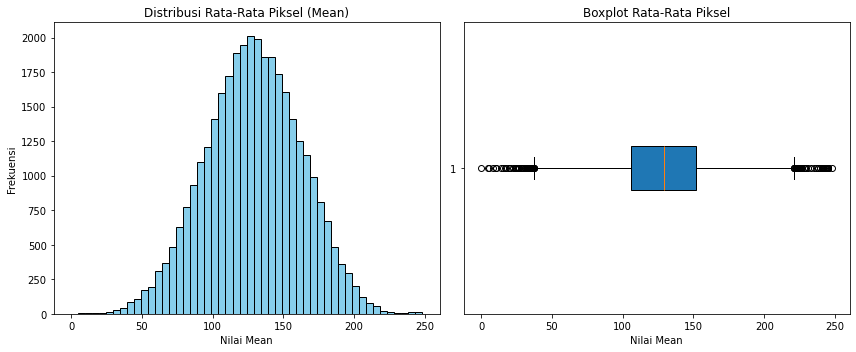

In [62]:
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(stats['mean'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribusi Rata-Rata Piksel (Mean)')
plt.xlabel('Nilai Mean')
plt.ylabel('Frekuensi')

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(stats['mean'], vert=False, patch_artist=True)
plt.title('Boxplot Rata-Rata Piksel')
plt.xlabel('Nilai Mean')

plt.tight_layout()
plt.show()

Gambar terlalu gelap: 191
Gambar terlalu terang: 28


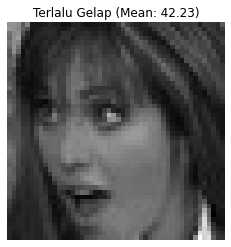

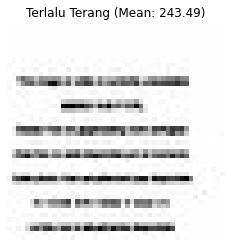

In [64]:
threshold_dark = 45  # Jika rata-rata piksel < 45, dianggap terlalu gelap
threshold_bright = 230  # Jika rata-rata piksel > 230, dianggap terlalu terang

dark_images = stats[stats['mean'] < threshold_dark]
bright_images = stats[stats['mean'] > threshold_bright]

print(f"Gambar terlalu gelap: {len(dark_images)}")
print(f"Gambar terlalu terang: {len(bright_images)}")

# Contoh menampilkan gambar yang terlalu terang/gelap
if not dark_images.empty:
    idx = dark_images.index[190]
    pixel_data = pixels[idx].reshape(48, 48)
    plt.imshow(pixel_data, cmap='gray')
    plt.title(f"Terlalu Gelap (Mean: {stats['mean'][idx]:.2f})")
    plt.axis('off')
    plt.show()

if not bright_images.empty:
    idx = bright_images.index[0]
    pixel_data = pixels[idx].reshape(48, 48)
    plt.imshow(pixel_data, cmap='gray')
    plt.title(f"Terlalu Terang (Mean: {stats['mean'][idx]:.2f})")
    plt.axis('off')
    plt.show()